# Fruit Detection

In [0]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.image import rgb_to_grayscale

import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [0]:
indices_train, indices_test = [], []

# Wir untersuchen, ob es sich bei einem Eintrag der Trainings-Labels um eines der Früchte handelt.
# Falls ja, fügen wir dessen Index einem zuvor initialisiertem Array hinzu.
for i in range(len(y_train)):
    if y_train[i] == 0 or y_train[i] == 53 or y_train[i] == 57:
        indices_train.append(i)

# Selbiges führen wir für alle Test-Labels durch.
for i in range(len(y_test)):
    if y_test[i] == 0 or y_test[i] == 53 or y_test[i] == 57:
        indices_test.append(i)

# Wir reduzieren unsere Trainings- und Test-Labels auf alle die der Früchte.
y_train = np.array(y_train[indices_train])
y_test = np.array(y_test[indices_test])

# Wir reduzieren unsere Trainings- und Testdaten auf alle die der Früchte.
x_train = x_train[np.ravel(indices_train)]
x_test = x_test[np.ravel(indices_test)]

# Für die Konvertierung unserer Label-Vektoren in Binäre-Klassenmatrizen, ändern wir alle ursprünglichen
# Trainings- und Test-Labels in die Werte 0-2. Man beachte: range(start, ende) inkludiert ende nicht!
for i in range(len(y_train)):
    if y_train[i] == 0:
        np.put(y_train, i, 0)
    elif y_train[i] == 53:
        np.put(y_train, i, 1)
    elif y_train[i] == 57:
        np.put(y_train, i, 2)

for i in range(len(y_test)):
    if y_test[i] == 0:
        np.put(y_test, i, 0)
    elif y_test[i] == 53:
        np.put(y_test, i, 1)
    elif y_test[i] == 57:
        np.put(y_test, i, 2)

class_names = ["Apfel", "Orange", "Birne"]



In [23]:
# Convert to grayscale
x_train = tf.Session().run(rgb_to_grayscale(
    x_train,
    name=None
))
x_test = tf.Session().run(rgb_to_grayscale(
    x_test,
    name=None
))

# Drop last dimension
x_train = x_train[:,:,:,0]
x_test = x_test[:,:,:,0]

print(x_train[0])


[[250 248 247 ... 250 250 249]
 [250 247 245 ... 250 251 250]
 [250 247 245 ... 248 248 248]
 ...
 [213 207 209 ... 178 194 230]
 [221 219 218 ... 187 202 232]
 [232 232 231 ... 210 217 230]]


In [0]:
x_train = x_train / 255.0

x_test = x_test / 255.0

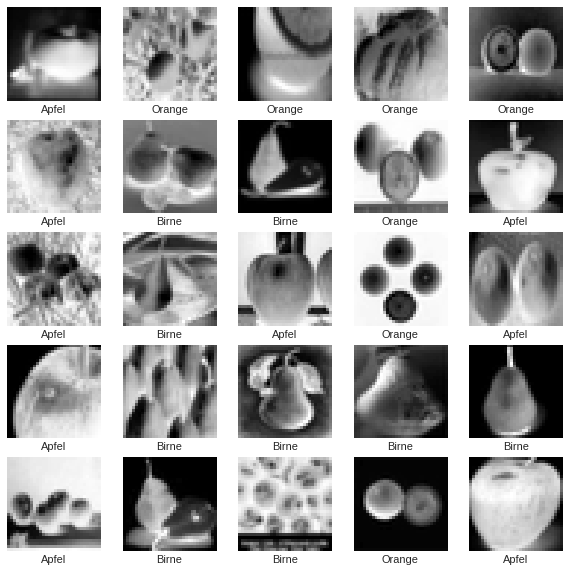

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.asscalar(y_train[i])])

In [0]:
model = Sequential([
    Flatten(input_shape=(32, 32)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
tensorboardCb = keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))

In [28]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1500/1500 [==============================] - 0s 198us/step - loss: 1.1957 - acc: 0.3987
Epoch 2/50
1500/1500 [==============================] - 0s 117us/step - loss: 1.0478 - acc: 0.4447
Epoch 3/50
1500/1500 [==============================] - 0s 111us/step - loss: 1.0229 - acc: 0.4633
Epoch 4/50
1500/1500 [==============================] - 0s 117us/step - loss: 1.0321 - acc: 0.4673
Epoch 5/50
1500/1500 [==============================] - 0s 134us/step - loss: 1.0365 - acc: 0.4740
Epoch 6/50
1500/1500 [==============================] - 0s 133us/step - loss: 0.9755 - acc: 0.4893
Epoch 7/50
1500/1500 [==============================] - 0s 100us/step - loss: 0.9858 - acc: 0.4967
Epoch 8/50
1500/1500 [==============================] - 0s 96us/step - loss: 0.9511 - acc: 0.5207
Epoch 9/50
1500/1500 [==============================] - 0s 90us/step - loss: 0.9429 - acc: 0.5247
Epoch 10/50
1500/1500 [==============================] - 0s 91us/step - loss: 0.9364 - acc: 0.5407
Epoch 11/50


In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

300/300 [==============================] - 0s 286us/step
Test accuracy: 0.5333333325386047


In [0]:
predictions = model.predict(x_test)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[np.asscalar(predicted_label)],
                                100*np.max(predictions_array),
                                class_names[np.asscalar(true_label)]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[np.asscalar(predicted_label)].set_color('red')
  thisplot[np.asscalar(true_label)].set_color('blue')

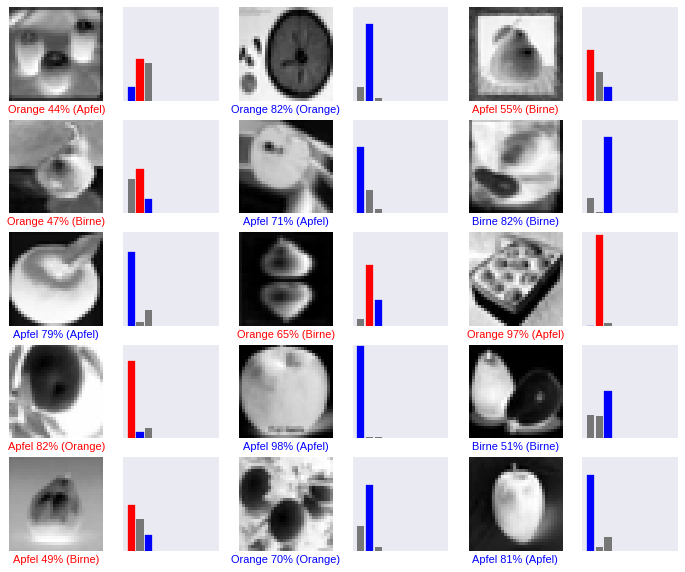

In [32]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)